In [217]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
plt.style.use('ggplot')

In [193]:
data = pd.read_excel('.././data/data2/Dataset_Question2.xlsx')
data['Test'] = data['Test'].map({'Pass': 1, 'Fail': 0})

In [19]:
# Some quick plots
def generate_plot(df, col):
    fig = plt.figure(figsize=(14, 4))
    ax1 = fig.add_subplot(121)
    df[col].plot(kind='hist', bins=20, edgecolor='black')
    ax1.set_title(col)
    ax2 = fig.add_subplot(122)
    df[col].plot(kind='kde')
    ax2.set_title(col + ': KDE')
    plt.tight_layout()
    plt.show()

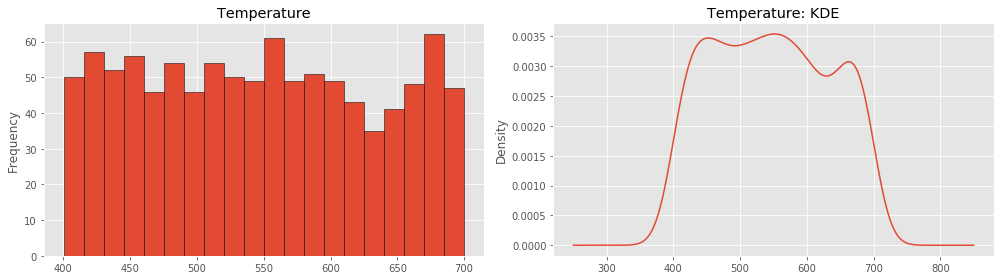

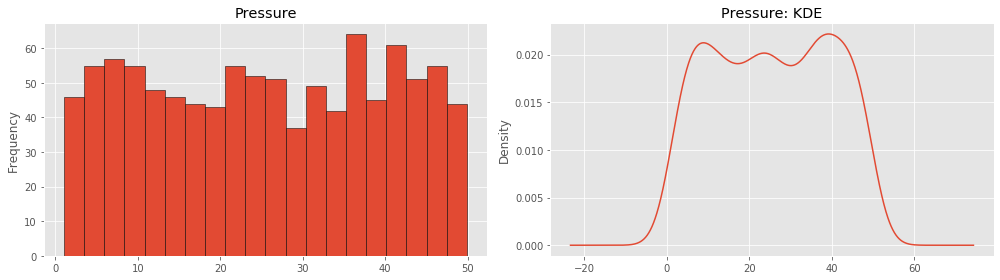

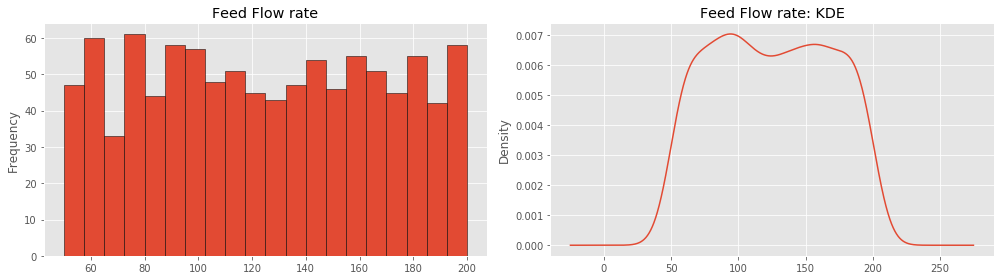

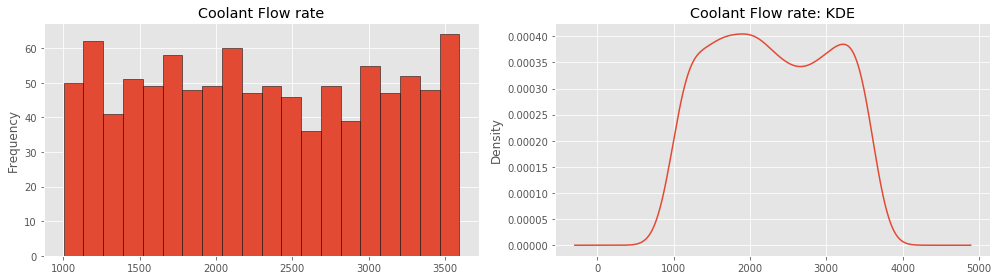

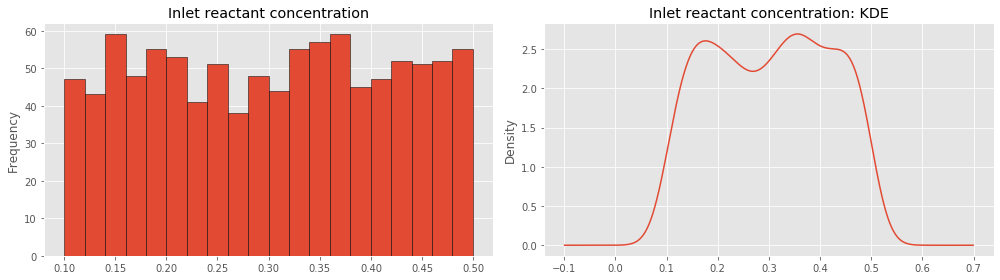

In [20]:
for col in ['Temperature', 'Pressure', 'Feed Flow rate', 'Coolant Flow rate', 
            'Inlet reactant concentration']:
    generate_plot(data, col)

In [194]:
# Minmax scaling
num_cols = ['Temperature', 'Pressure', 'Feed Flow rate', 'Coolant Flow rate', 
            'Inlet reactant concentration']
scaler = MinMaxScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# Separate pass and fail cases
pass_data = data[data['Test'] == 1]
fail_data = data[data['Test'] == 0]

In [26]:
# Pass data values
pass_vals = pass_data[num_cols].values[:20]
fail_vals = fail_data[num_cols].values[:20]

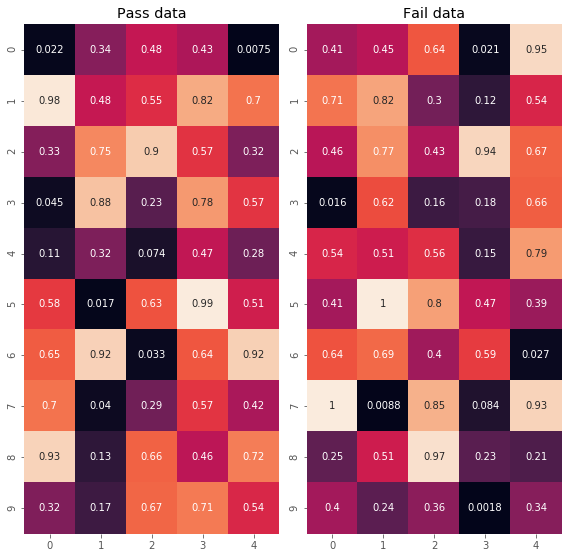

In [37]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(121)
sns.heatmap(pass_vals, square=True, cbar=False, annot=True)
ax1.set_title('Pass data')
ax2 = fig.add_subplot(122)
sns.heatmap(fail_vals, square=True, cbar=False, annot=True)
ax2.set_title('Fail data')
plt.tight_layout()
plt.show()

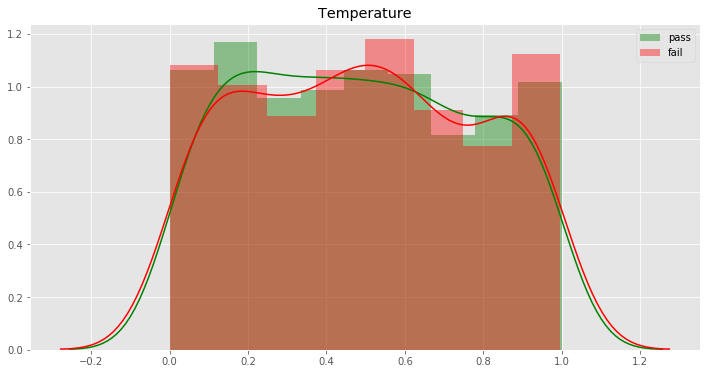

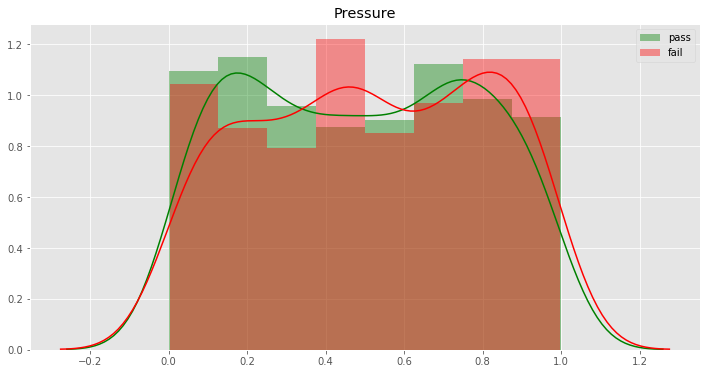

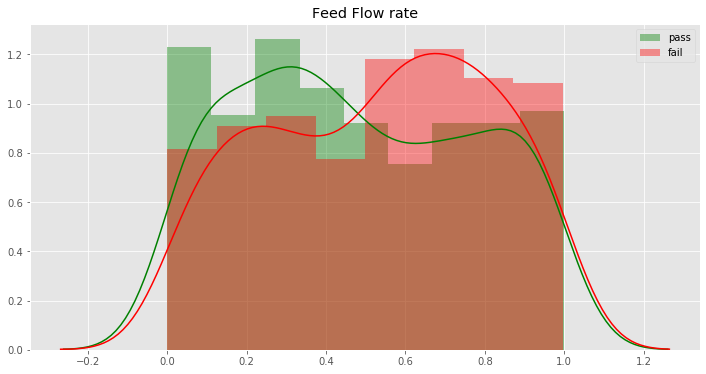

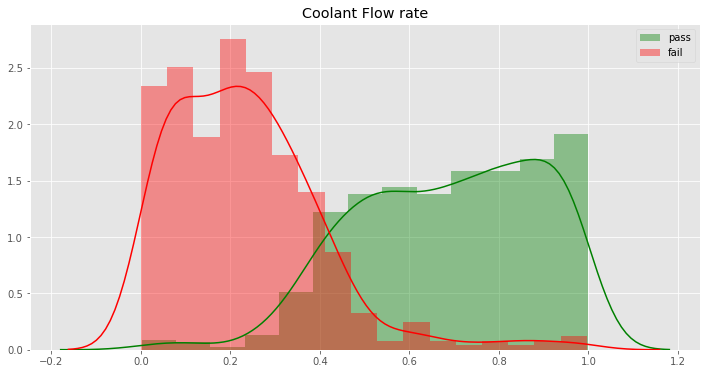

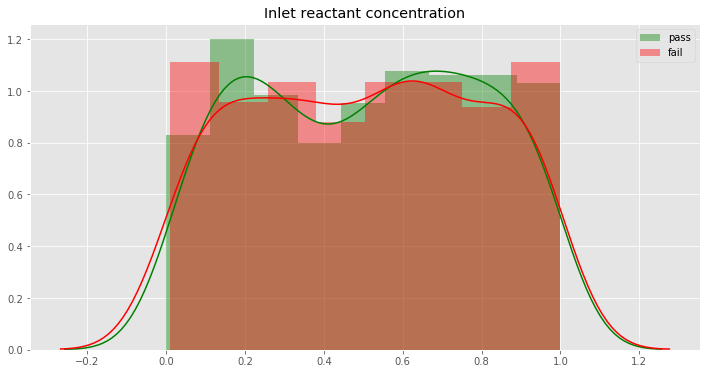

In [39]:
# Class distributions
def class_distrib(pass_df, fail_df, col):
    fig = plt.figure(figsize=(12, 6))
    sns.distplot(pass_df[col].values, color='green', 
                 hist=True, kde=True, label='pass')
    sns.distplot(fail_df[col].values, color='red',
                 hist=True, kde=True, label='fail')
    plt.title(col)
    plt.legend()
    plt.show()
    
for col in num_cols:
    class_distrib(pass_data, fail_data, col)

# Logistic Regression

In [208]:
class LogisticClassifier():
    
    def __init__(self):
        # Initialize weights
        self.weights = None
        self.bias = None
        
    def sigmoid(self, x):
        act = np.dot(self.weights.T, x) + self.bias
        return 1.0/(1.0 + np.exp(-act))
    
    def logloss(self, x, y):
        return -(y*np.log(self.sigmoid(x)+1e-03) - (1-y)*np.log(1-self.sigmoid(x)+1e-03))
    
    def update(self, x, y):
        x = x.reshape(-1, 1)
        w_grad = -(y - self.sigmoid(x)) * x
        b_grad = -(y - self.sigmoid(x))
        self.weights -= self.lr * w_grad
        self.bias -= self.lr * b_grad
        return w_grad, self.weights, b_grad, self.bias
        
    def fit(self, X, y, epochs, learning_rate, log_frequency=10):
        # Assign parameters
        self.X = X
        self.y = y
        self.lr = learning_rate
        self.weights = np.random.random((X.shape[1], 1))
        self.bias = np.random.random()
        
        # Run over every epoch
        for i in range(epochs):
            loss = []
            for j in range(X.shape[0]):
                self.update(X[j], y[j])
                loss.append(self.logloss(X[j], y[j]))
            
            # Print state every epoch
            if i % log_frequency == 0:
                print("Epoch {}/{} \t Logloss: {:.5f}".format(
                    i+1, epochs, np.mean(loss)
                ))
            
    def predict(self, data, probs=True):
        if probs is True:
            return np.array([self.sigmoid(i) for i in data])
        else:
            return np.array([1 if self.sigmoid(i) > 0.5 else 0 for i in data])

In [221]:
# Separate data and labels
X = data[num_cols].values
labels = data['Test'].values

log_clf = LogisticClassifier()
log_clf.fit(X, labels, epochs=150, learning_rate=0.001)

Epoch 1/150 	 Logloss: -0.67478
Epoch 11/150 	 Logloss: -0.05748
Epoch 21/150 	 Logloss: -0.04157
Epoch 31/150 	 Logloss: -0.03407
Epoch 41/150 	 Logloss: -0.02939
Epoch 51/150 	 Logloss: -0.02637
Epoch 61/150 	 Logloss: -0.02437
Epoch 71/150 	 Logloss: -0.02303
Epoch 81/150 	 Logloss: -0.02212
Epoch 91/150 	 Logloss: -0.02150
Epoch 101/150 	 Logloss: -0.02110
Epoch 111/150 	 Logloss: -0.02084
Epoch 121/150 	 Logloss: -0.02070
Epoch 131/150 	 Logloss: -0.02063
Epoch 141/150 	 Logloss: -0.02062


In [212]:
preds = log_clf.predict(X, probs=False)

In [219]:
def accuracy_score(predictions, labels):
    return np.mean(np.asarray(predictions) == np.asarray(labels))

accuracy_score(labels, preds)

0.949

# Scikit learn comparison
Our model's doing quite well!

In [223]:
logreg = LogisticRegression()
logreg.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [225]:
preds2 = logreg.predict(X)
accuracy_score(labels, preds)

0.949